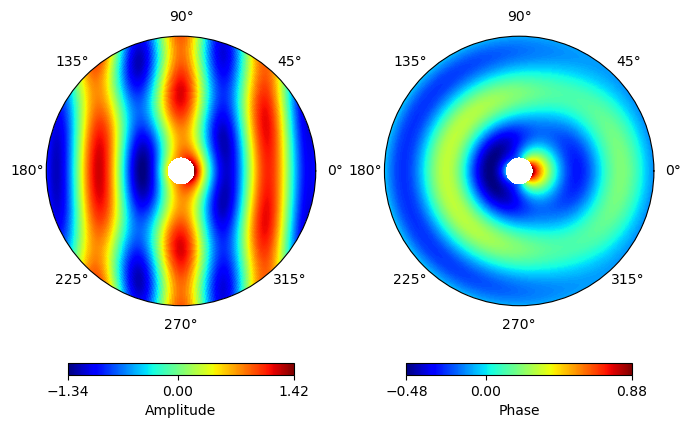

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from scipy.special import jn, hankel2
from numpy import pi, exp, cos, zeros_like

def u(nmax, k, a, r, theta):
    u_tot = zeros_like(r, dtype=complex)  # Initialize total displacement field
    u_scn = zeros_like(r, dtype=complex)  # Initialize scattered wave
    for n in range(nmax, -1, -1):
        if n == 0:
            # Coefficient for n = 0
            an = -jn(1, k*a) / hankel2(1, k*a)
            en = 1.0
        else:
            # Coefficients for n > 0
            an = -2.0 * (-1.0)**n * ((jn(n + 1, k*a) - jn(n - 1, k*a)) /
                                     (hankel2(n + 1, k*a) - hankel2(n - 1, k*a)))
            en = 2.0
        # Sum terms for both scattered and incident waves
        usn = an * 1.0j**n * hankel2(n, k*r) * cos(n*theta)
        uin = en * 1.0j**n * jn(n, -k*r) * cos(n*theta) * exp(1j*pi)
        u_tot = u_tot + usn + uin
        u_scn = u_scn + usn
    return u_tot, u_scn

def gen_disp(r, theta, k, nmax=30):
    return u(nmax, k, 1.0, r, theta)  # a=1.0, which is the radius for the boundary

# Define the grid in polar (cylindrical) coordinates
r = np.linspace(0.1, 10, 501)  # Radial distance from 0.1 to 10 (avoid 0 to prevent singularity)
theta = np.linspace(0, 2*pi, 501)  # Angle from 0 to 2*pi

R, Theta = np.meshgrid(r, theta)  # Create meshgrid for r and theta

# Calculate the displacement
k = 1.0  # Wave number
u_tot, u_scn = gen_disp(R, Theta, k)  # Calculate the displacement

# Mask out regions where r < 1 (inside the circle with radius 1)
u_tot_amp = -ma.masked_where(R < 1.0, np.real(u_tot))
u_tot_phase = ma.masked_where(R < 1.0, np.angle(u_tot))
u_scn_amp = -ma.masked_where(R < 1.0, np.real(u_scn))
u_scn_phase = ma.masked_where(R < 1.0, np.angle(u_scn))

# Plot the amplitude in polar coordinates
plt.figure(figsize=(8, 5))

# Plot amplitude (real part of displacement) in polar coordinates
ax1 = plt.subplot(1, 2, 1, projection='polar')
c = ax1.pcolormesh(Theta, R, np.round(np.real(u_tot_amp),2), cmap="jet", shading='auto')   
cb = plt.colorbar(c, ax=ax1, shrink=0.8, orientation="horizontal")
cb.set_label("Amplitude")
#cb.set_ticks([np.round(np.min(np.real(u_tot_amp)), 2), 0, np.round(np.max(np.real(u_tot_amp)), 2)])
ax1.set_yticklabels([])  # Remove radial labels
cb.set_ticks([np.round(np.min(np.real(u_tot_amp)),2), 0, np.round(np.max(np.real(u_tot_amp)),2)]) 
ax1.grid(False)  # Hide grid lines

# Plot the phase (angle of the displacement) in polar coordinates
ax2 = plt.subplot(1, 2, 2, projection='polar')
c = ax2.pcolormesh(Theta, R,  np.round(np.real(u_scn_amp),2), cmap="jet", shading='auto')  
cb = plt.colorbar(c, ax=ax2, shrink=0.8, orientation="horizontal")
cb.set_label("Phase")
# Remove radial grid lines and radial ticks
ax2.set_yticklabels([])  # Remove radial labels
ax2.grid(False)  # Hide grid lines
cb.set_ticks([np.round(np.min(np.real(u_scn_amp)),2), 0, np.round(np.max(np.real(u_scn_amp)),2)]) 
plt.show()